In [1]:
# driveに接続
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# drive書き出し準備
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# ライブラリのインポート
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import csv
import gc
import spacy

In [4]:
# dataの読み込み
submit = pd.read_csv('/content/drive/My Drive/Signate/SIGNATE Student Cup 2020【予測部門】/submit_sample.csv', header=None)
test = pd.read_csv('/content/drive/My Drive/Signate/SIGNATE Student Cup 2020【予測部門】/test.csv')
train = pd.read_csv('/content/drive/My Drive/Signate/SIGNATE Student Cup 2020【予測部門】/train.csv')

In [30]:
DS = train[train['jobflag'] == 1]
DSdata = DS['description']
ML = train[train['jobflag'] == 2]
MLdata = ML['description']
SE = train[train['jobflag'] == 3]
SEdata = SE['description']
CT = train[train['jobflag'] == 4]
CTdata = CT['description']
#object型からlist型への変形
DSdata = DSdata.values.tolist()
MLdata = MLdata.values.tolist()
SEdata = SEdata.values.tolist()
CTdata = CTdata.values.tolist()
#大文字を小文字化
DSdata = list(map(str.lower,DSdata))
MLdata = list(map(str.lower,MLdata))
SEdata = list(map(str.lower,SEdata))
CTdata = list(map(str.lower,CTdata))
print(DSdata)

['keep up to date with local and national business and economic issues', 'must be able to work independently in a small team.', 'work with stakeholders to identify opportunities for leveraging company data to drive business solutions.', 'undertake preprocessing of structured and unstructured data', 'work with cross-functional teams to develop ideas and execute business plans.', 'work in a startup-type environment to design and build innovative applications using automation, machine learning/cognitive service, business / functional proofs-of-concepts to scalable, production ready solutions across a strategic business group', 'strategize in collaboration with functional teams to identify data-driven solutions to ongoing needs across the organization.', 'work across teams to report on key metrics and develop kpis', 'produce data visualizations that provide insight into data set structure and meaning', 'apply knowledge of systems integration to their work', 'work with the laboratory staff,

In [7]:
nlp = spacy.load("en_core_web_sm")

In [74]:
List = DSdata
word_list = []
n_DS = len(DSdata)

i = 0
for i in range(n_DS):
  doc = nlp(List[i])
  for token in doc:
    word_list.append(token.lemma_)
  i += 1

word_list_stop = [i for i in word_list if i != ' ' if i != '' if i != '-PRON-' if i != '"' if i != "'s" if i != ')' if i != ';' if i != '(' if i != ':' if i != ',' if i != '.' if i != 'each' if i != 'one' if i != 'some' if i != 'must' if i != 'while' if i != 'but' if i != 'any' if i != 'not' if i != '-' if i != 'able' if i != 'you' if i != 'may' if i != 'out' if i != 'which' if i != 'what' if i != 'etc' if i != 'by' if i != 'across' if i != '&' if i != 'your' if i != 'them' if i != 'our' if i != 'through' if i != 'their' if i != 'at' if i != 'all' if i != 'both' if i != 'and/or' if i != 'is' if i != 'will' if i != 'into' if i != 'be' if i != 'or' if i != 'and' if i != 'to' if i != 'the' if i != 'of' if i != 'with' if i != 'for' if i != 'in' if i != 'a' if i != 'on' if i != 'as' if i != 'that' if i != 'from' if i != 'an' if i != 'such' if i != 'are' if i != 'other' if i != '/' if i != 'well' if i != 'up' if i != 'this' if i != 'how' if i != 'within']
print(word_list_stop)  

['keep', 'date', 'local', 'national', 'business', 'economic', 'issue', 'work', 'independently', 'small', 'team', 'work', 'stakeholder', 'identify', 'opportunity', 'leverage', 'company', 'datum', 'drive', 'business', 'solution', 'undertake', 'preprocessing', 'structured', 'unstructured', 'datum', 'work', 'cross', 'functional', 'team', 'develop', 'idea', 'execute', 'business', 'plan', 'work', 'startup', 'type', 'environment', 'design', 'build', 'innovative', 'application', 'use', 'automation', 'machine', 'learning', 'cognitive', 'service', 'business', 'functional', 'proof', 'concept', 'scalable', 'production', 'ready', 'solution', 'strategic', 'business', 'group', 'strategize', 'collaboration', 'functional', 'team', 'identify', 'datum', 'drive', 'solution', 'ongoing', 'need', 'organization', 'work', 'team', 'report', 'key', 'metric', 'develop', 'kpis', 'produce', 'data', 'visualization', 'provide', 'insight', 'datum', 'set', 'structure', 'meaning', 'apply', 'knowledge', 'system', 'integr

In [75]:
words_ds = {}
for word in word_list_stop:
  words_ds[word] = words_ds.get(word, 0) + 1

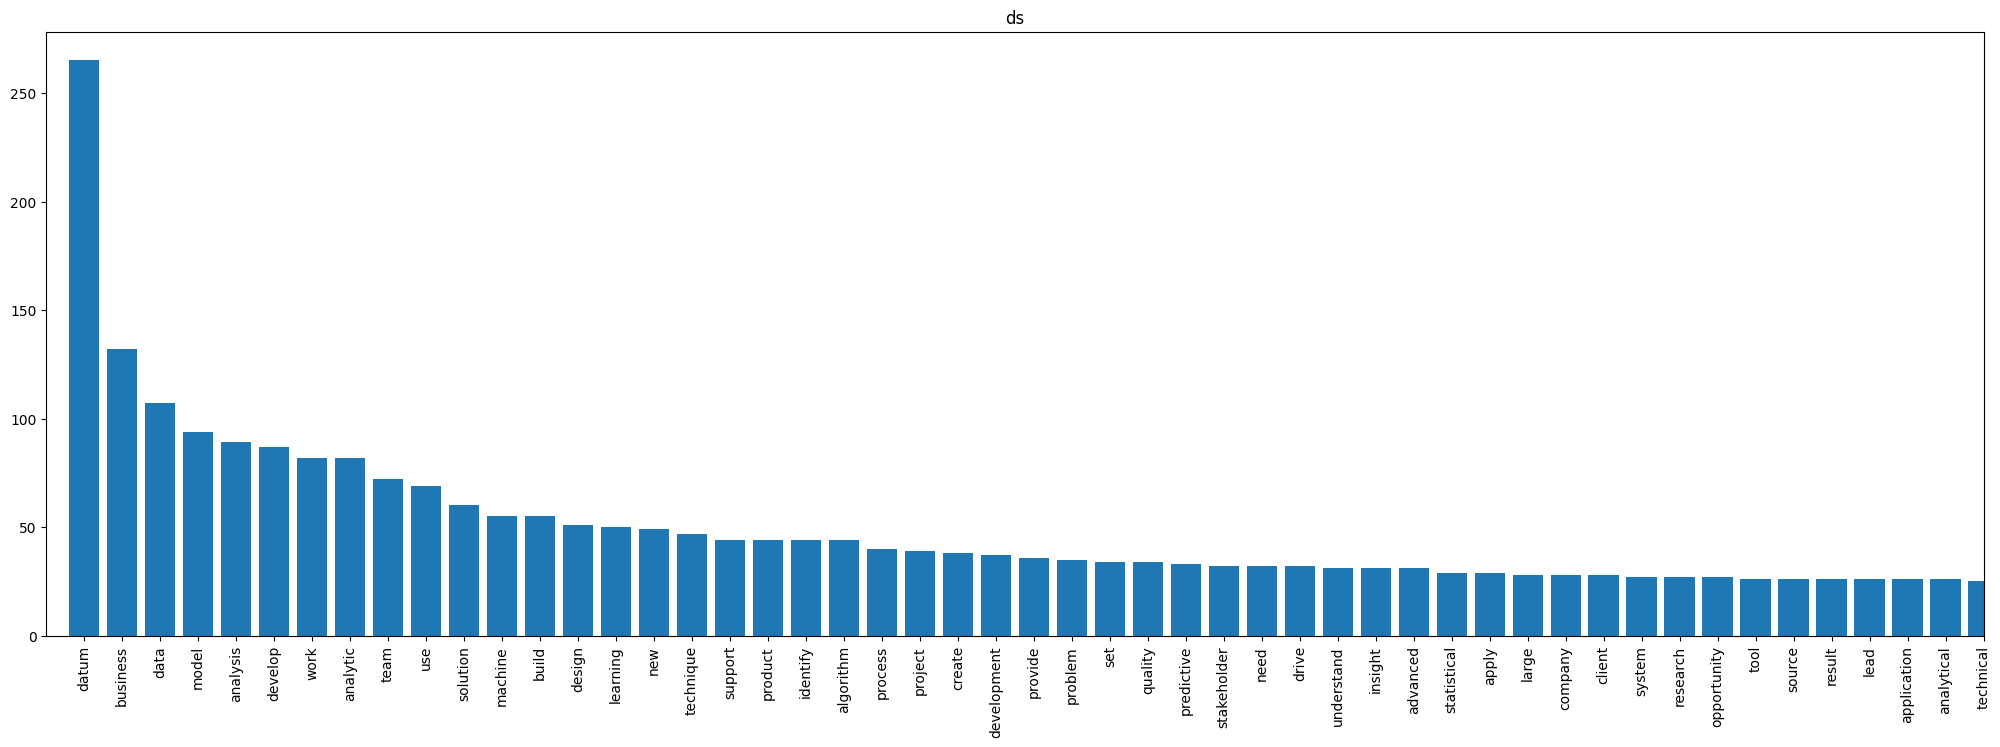

In [77]:
ds = [(v, k) for k, v in words_ds.items()]
ds.sort()
ds.reverse()
x_ds = [ds[:400][i][1] for i in range(0,400)]
y_ds = [ds[:400][i][0] for i in range(0,400)]
plt.figure(figsize=(25,8), dpi=100)
plt.title('ds')
plt.bar(x_ds, y_ds)
plt.xticks(rotation=90)
plt.xlim(-1,50)
plt.show()

In [72]:
List = MLdata
word_list = []
n_ML = len(MLdata)

i = 0
for i in range(n_ML):
  doc = nlp(List[i])
  for token in doc:
    word_list.append(token.lemma_)
  i += 1

word_list_stop = [i for i in word_list if i != ' ' if i != '' if i != '-PRON-' if i != '"' if i != "'s" if i != ')' if i != ';' if i != '(' if i != ':' if i != ',' if i != '.' if i != 'each' if i != 'one' if i != 'some' if i != 'must' if i != 'while' if i != 'but' if i != 'any' if i != 'not' if i != '-' if i != 'able' if i != 'you' if i != 'may' if i != 'out' if i != 'which' if i != 'what' if i != 'etc' if i != 'by' if i != 'across' if i != '&' if i != 'your' if i != 'them' if i != 'our' if i != 'through' if i != 'their' if i != 'at' if i != 'all' if i != 'both' if i != 'and/or' if i != 'is' if i != 'will' if i != 'into' if i != 'be' if i != 'or' if i != 'and' if i != 'to' if i != 'the' if i != 'of' if i != 'with' if i != 'for' if i != 'in' if i != 'a' if i != 'on' if i != 'as' if i != 'that' if i != 'from' if i != 'an' if i != 'such' if i != 'are' if i != 'other' if i != '/' if i != 'well' if i != 'up' if i != 'this' if i != 'how' if i != 'within']

words_ml = {}
for word in word_list_stop:
  words_ml[word] = words_ml.get(word, 0) + 1

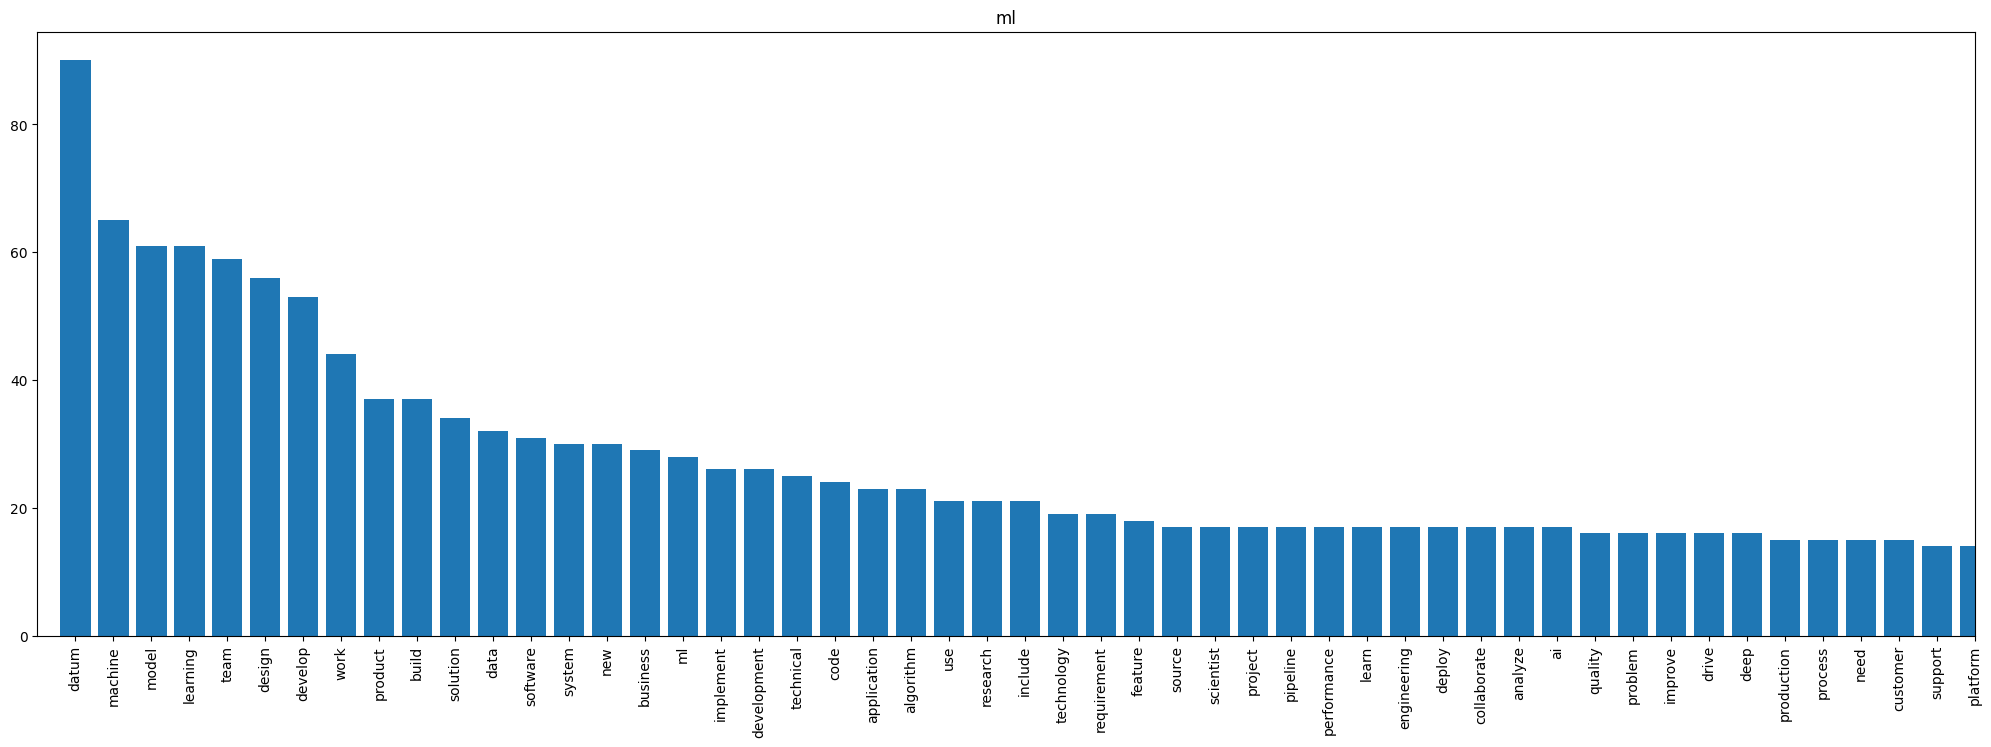

In [73]:
ml = [(v, k) for k, v in words_ml.items()]
ml.sort()
ml.reverse()
x_ml = [ml[:400][i][1] for i in range(0,400)]
y_ml = [ml[:400][i][0] for i in range(0,400)]
plt.figure(figsize=(25,8), dpi=100)
plt.title('ml')
plt.bar(x_ml, y_ml)
plt.xticks(rotation=90)
plt.xlim(-1,50)
plt.show()

In [78]:
List = SEdata
word_list = []
n_SE = len(SEdata)

i = 0
for i in range(n_SE):
  doc = nlp(List[i])
  for token in doc:
    word_list.append(token.lemma_)
  i += 1

word_list_stop = [i for i in word_list if i != ' ' if i != '' if i != '-PRON-' if i != '"' if i != "'s" if i != ')' if i != ';' if i != '(' if i != ':' if i != ',' if i != '.' if i != 'each' if i != 'one' if i != 'some' if i != 'must' if i != 'while' if i != 'but' if i != 'any' if i != 'not' if i != '-' if i != 'able' if i != 'you' if i != 'may' if i != 'out' if i != 'which' if i != 'what' if i != 'etc' if i != 'by' if i != 'across' if i != '&' if i != 'your' if i != 'them' if i != 'our' if i != 'through' if i != 'their' if i != 'at' if i != 'all' if i != 'both' if i != 'and/or' if i != 'is' if i != 'will' if i != 'into' if i != 'be' if i != 'or' if i != 'and' if i != 'to' if i != 'the' if i != 'of' if i != 'with' if i != 'for' if i != 'in' if i != 'a' if i != 'on' if i != 'as' if i != 'that' if i != 'from' if i != 'an' if i != 'such' if i != 'are' if i != 'other' if i != '/' if i != 'well' if i != 'up' if i != 'this' if i != 'how' if i != 'within']

words_se = {}
for word in word_list_stop:
  words_se[word] = words_se.get(word, 0) + 1

In [79]:
List = CTdata
word_list = []
n_CT = len(CTdata)

i = 0
for i in range(n_CT):
  doc = nlp(List[i])
  for token in doc:
    word_list.append(token.lemma_)
  i += 1

word_list_stop = [i for i in word_list if i != ' ' if i != '' if i != '-PRON-' if i != '"' if i != "'s" if i != ')' if i != ';' if i != '(' if i != ':' if i != ',' if i != '.' if i != 'each' if i != 'one' if i != 'some' if i != 'must' if i != 'while' if i != 'but' if i != 'any' if i != 'not' if i != '-' if i != 'able' if i != 'you' if i != 'may' if i != 'out' if i != 'which' if i != 'what' if i != 'etc' if i != 'by' if i != 'across' if i != '&' if i != 'your' if i != 'them' if i != 'our' if i != 'through' if i != 'their' if i != 'at' if i != 'all' if i != 'both' if i != 'and/or' if i != 'is' if i != 'will' if i != 'into' if i != 'be' if i != 'or' if i != 'and' if i != 'to' if i != 'the' if i != 'of' if i != 'with' if i != 'for' if i != 'in' if i != 'a' if i != 'on' if i != 'as' if i != 'that' if i != 'from' if i != 'an' if i != 'such' if i != 'are' if i != 'other' if i != '/' if i != 'well' if i != 'up' if i != 'this' if i != 'how' if i != 'within']

words_ct = {}
for word in word_list_stop:
  words_ct[word] = words_ct.get(word, 0) + 1

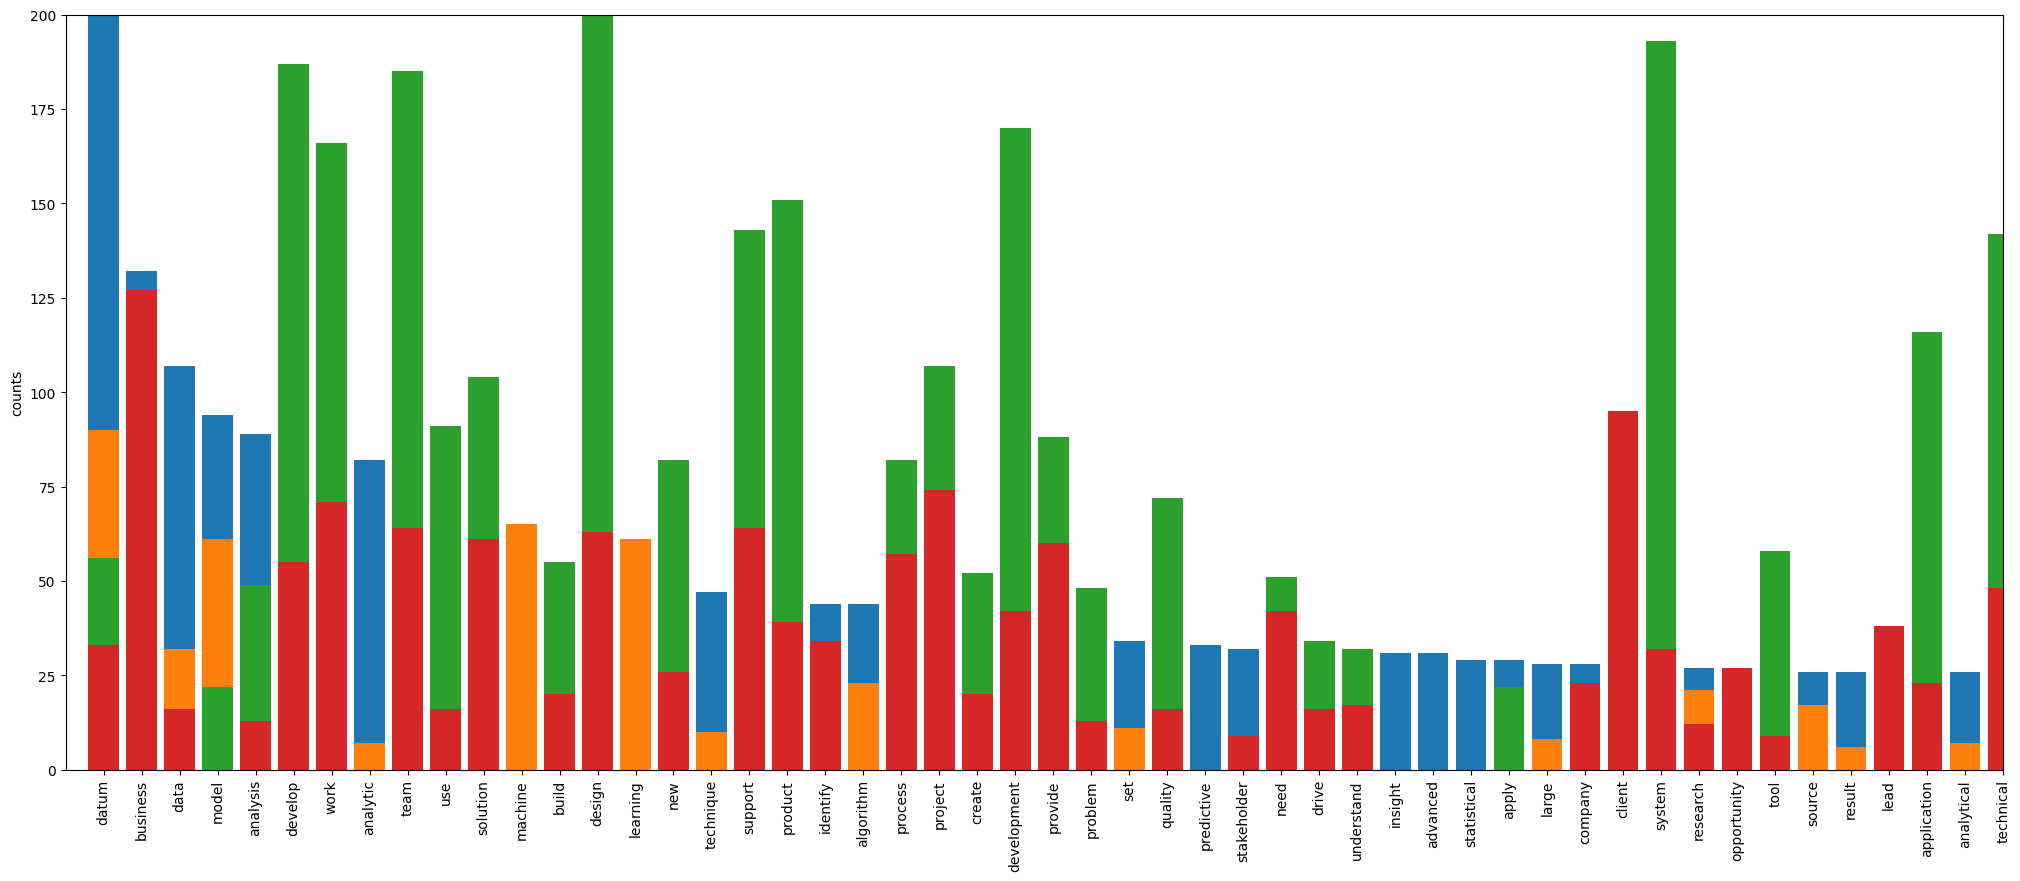

In [80]:
import matplotlib.pyplot as plt

ds = [(v, k) for k, v in words_ds.items()]
ds.sort()
ds.reverse()
ml = [(v, k) for k, v in words_ml.items()]
ml.sort()
ml.reverse()
se = [(v, k) for k, v in words_se.items()]
se.sort()
se.reverse()
ct = [(v, k) for k, v in words_ct.items()]
ct.sort()
ct.reverse()

x_ds = [ds[:150][i][1] for i in range(0,150)]
x_ml = [ml[:150][i][1] for i in range(0,150)]
x_se = [se[:150][i][1] for i in range(0,150)]
x_ct = [ct[:150][i][1] for i in range(0,150)]
y_ds = [ds[:150][i][0] for i in range(0,150)]
y_ml = [ml[:150][i][0] for i in range(0,150)]
y_se = [se[:150][i][0] for i in range(0,150)]
y_ct = [ct[:150][i][0] for i in range(0,150)]

plt.figure(figsize=(25,10), dpi=100)
ax=plt.subplot()
ax.set_ylabel("counts")
#plt.title('Data Scientist')
plt.bar(x_ds, y_ds)
plt.bar(x_ml, y_ml)
plt.bar(x_se, y_se)
plt.bar(x_ct, y_ct)
plt.xticks(rotation=90)
plt.xlim(-1,50)
plt.ylim(0,200)
plt.show()

In [110]:
pred = []

id = 0
Data = test['description']
Data = Data.values.tolist()
Data = list(map(str.lower,Data))
n = len(Data)
while id < n:
  data = Data[id]
  value_ds = 0
  value_ml = 0
  value_se = 0
  value_ct = 0
  # dataからsplit()でスペースと改行で分割したリストから単語を取り出す
  for Word in data.split():
    Word = Word.strip('.,')
    #print(Word)
    for token in nlp(Word):
      Word = token.lemma_
    #print(Word)
    if Word in words_ds and Word not in words_ml and Word not in words_se and Word not in words_ct:
      value_ds += 100000 / 624
    if Word not in words_ds and Word in words_ml and Word not in words_se and Word not in words_ct:
      value_ml += 100000 / 348
    if Word not in words_ds and Word not in words_ml and Word in words_se and Word not in words_ct:
      value_se += 100000 / 1376
    if Word not in words_ds and Word not in words_ml and Word not in words_se and Word in words_ct:
      value_ct += 100000 / 583
    # WordがDSに含まれていれば、その回数を評価値に追加
    if Word in words_ds:
      value = words_ds[Word]
      value_ds += value
    if Word in words_ml:
      value = words_ml[Word]
      value_ml += value
    if Word in words_se:
      value = words_se[Word]
      value_se += value
    if Word in words_ct:
      value = words_ct[Word]
      value_ct += value
    
    #print(value_ds, value_ml, value_se, value_ct)
  
  value_ds = value_ds / 624
  value_ml = value_ml / 348
  value_se = value_se / 1376
  value_ct = value_ct / 583

  # 評価値を比較し、最大のものに分類
  if value_ds > value_ml and value_ds > value_se and value_ds > value_ct:
    pred.append('1')
  elif value_ml > value_ds and value_ml > value_se and value_ml > value_ct:
    pred.append('2')
  elif value_se > value_ds and value_se > value_ml and value_se > value_ct:
    pred.append('3')
  elif value_ct > value_ds and value_ct > value_ml and value_ct > value_se:
    pred.append('4')
  else:
    pred.append('0')
  
  #print(value_ds, value_ml, value_se, value_ct)

  id += 1

print(pred)
print(pred.count(0))
print(pred.count('1'), pred.count('2'), pred.count('3'), pred.count('4'))

['2', '4', '3', '1', '4', '2', '1', '3', '3', '2', '1', '3', '4', '4', '4', '4', '3', '1', '4', '1', '3', '3', '1', '1', '2', '1', '1', '4', '3', '3', '3', '3', '1', '2', '1', '1', '4', '2', '1', '1', '3', '3', '2', '1', '4', '3', '2', '1', '4', '4', '4', '2', '1', '4', '4', '4', '3', '1', '4', '3', '2', '4', '1', '4', '4', '4', '3', '4', '1', '2', '1', '1', '4', '3', '4', '3', '1', '3', '3', '1', '4', '2', '3', '2', '2', '4', '1', '4', '3', '3', '1', '3', '3', '3', '2', '4', '3', '1', '2', '4', '3', '1', '2', '3', '3', '1', '1', '3', '3', '2', '4', '1', '4', '2', '3', '1', '1', '1', '4', '1', '4', '4', '3', '4', '4', '1', '4', '4', '1', '4', '1', '1', '1', '1', '3', '4', '3', '3', '1', '2', '1', '1', '1', '4', '4', '1', '4', '4', '3', '4', '4', '1', '4', '4', '3', '1', '3', '4', '4', '1', '3', '4', '1', '1', '3', '3', '2', '3', '3', '1', '3', '1', '1', '4', '2', '2', '4', '3', '1', '4', '3', '1', '4', '4', '2', '3', '3', '1', '4', '4', '3', '3', '1', '4', '1', '1', '1', '1', '4', '4',

In [109]:
y = train['jobflag']
y = y.values.tolist()
print(y)
n_DS = len(DSdata)
n_ML = len(MLdata)
n_SE = len(SEdata)
n_CT = len(CTdata)
print(n_DS, n_ML, n_SE, n_CT)

[2, 3, 4, 1, 4, 3, 3, 1, 1, 3, 2, 3, 4, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 2, 1, 3, 3, 1, 3, 4, 1, 3, 4, 1, 3, 3, 3, 3, 3, 2, 4, 3, 2, 3, 3, 4, 4, 1, 3, 3, 3, 3, 1, 4, 4, 3, 3, 3, 1, 2, 2, 3, 4, 4, 4, 3, 3, 4, 3, 4, 1, 3, 4, 4, 2, 2, 3, 1, 3, 3, 3, 3, 3, 2, 1, 3, 3, 2, 3, 3, 1, 4, 3, 3, 3, 3, 1, 3, 3, 3, 3, 4, 1, 1, 3, 3, 2, 4, 3, 4, 3, 1, 3, 4, 3, 1, 2, 3, 4, 3, 3, 1, 3, 3, 3, 3, 4, 1, 2, 3, 2, 4, 3, 2, 3, 3, 4, 2, 1, 3, 3, 3, 4, 3, 3, 4, 1, 4, 4, 3, 4, 3, 2, 2, 1, 3, 3, 4, 3, 3, 2, 3, 3, 2, 4, 3, 4, 1, 3, 4, 4, 2, 3, 4, 4, 3, 3, 3, 2, 1, 4, 3, 3, 1, 1, 1, 2, 4, 3, 1, 3, 3, 4, 4, 2, 2, 3, 4, 2, 3, 1, 1, 3, 2, 4, 3, 4, 3, 3, 3, 3, 2, 3, 1, 3, 1, 3, 3, 3, 4, 1, 1, 3, 4, 3, 4, 3, 4, 3, 4, 1, 1, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 3, 4, 4, 3, 3, 4, 2, 4, 3, 1, 4, 3, 1, 1, 4, 2, 4, 3, 4, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 3, 2, 1, 4, 4, 4, 3, 3, 3, 1, 4, 2, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 2, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, 3, 1, 4, 4, 2, 1, 3, 3, 3, 1, 2, 3, 4, 4, 2, 3, 3, 1, 

In [ ]:
submit[1] = answer
submit.to_csv("submit.csv", index = None, header = None)
# driveに書き出し
upload_file_2 = drive.CreateFile()
upload_file_2.SetContentFile("submit.csv")
upload_file_2.Upload()